This Dataset is a bank customer detail of 10000 customers.
It has Account Number, Age Of The Customer, Gender, Education Level, Marital Status, Account Type, No Of Linked Accounts, No Of Months On Bank, Has Credit Card, Credit Score, Estimated Income & Balance.

Libraries Used
The notebook utilizes the following libraries and techniques:

Data Manipulation:
pandas: For loading and preprocessing the dataset.
Data Preprocessing:
LabelEncoder from sklearn.preprocessing: For encoding categorical variables into numerical values.
StandardScaler from sklearn.preprocessing: For scaling numerical features.
Machine Learning Preparation:
train_test_split from sklearn.model_selection: For splitting the dataset into training and testing sets.
LogisticRegression from sklearn.linear_model, RandomForestClassifier for analyzing
Classification_report, confusion_matrix, roc_auc_score from sklearn.metrics to look for the model performnace.
Matplotlib, roc_curve, seaborn, ConfusionMatrixDisplay,precision_recall_curve, GridSearchCV, plot_tree for data visualization


Data Processing Techniques
Handling Missing Data:
Median imputation for numerical columns like Age, no of Linked Accounts, no of months in bank, Credit score and Balance_Amount.
Mode imputation for categorical columns such as Gender, EducationLevel, Marital_Status, Account type and Has Credit card.
Feature Engineering:
Encoding categorical columns like Gender and EducationLevel using LabelEncoder.
Standardizing numerical features for better model performance.
Drop column Account no.

Algorithms and Models:
While the provided cells focus on data preparation, they lay the groundwork for:

Binary Classification:
The Credit_Score column is converted into a binary target variable (greater than 650 is labeled as 1, otherwise 0).
Data Splitting:
The dataset is split into training and testing subsets with an 80/20 ratio.
Additional Observations
The dataset appears to focus on banking customer details, including attributes like Account_Type, No_Of_Linked_Accounts, and Balance_Amount.
A column named Account_No is dropped, likely deemed irrelevant for modeling.
Feature Importance shows Balance amount on top followed by No of Months in Bank and then Age.

Logistic Regression model shows accuracy of 47%
Random Forest Classifier gives accuracy of 61%



In [15]:
import pandas as pd
data = pd.read_csv('Bank Customer Details Updated.csv')

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Account_No             10000 non-null  int64  
 1   Age                    9991 non-null   float64
 2   Gender                 9998 non-null   object 
 3   EducationLevel         9997 non-null   object 
 4   Marital_Status         9993 non-null   object 
 5   Account_Type           9998 non-null   object 
 6   No_Of_Linked_Accounts  9995 non-null   float64
 7   No_Of_Months_On_Bank   9998 non-null   float64
 8   Has_Credit_Card        9957 non-null   object 
 9   Credit_Score           9995 non-null   float64
 10  Estimated_Income       9981 non-null   object 
 11  Balance_Amount         9994 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 937.6+ KB


,Account_No,Age,Gender,EducationLevel,Marital_Status,Account_Type,No_Of_Linked_Accounts,No_Of_Months_On_Bank,Has_Credit_Card,Credit_Score,Estimated_Income,Balance_Amount
0,4998365300,45.0,Male,High School,Married,Savings,1.0,42.0,Yes,619.0,60K - 80K,1000000.0
1,4998365301,49.0,Female,Graduate,Single,Savings,1.0,41.0,No,608.0,Less than 40K,2000000.0
2,4998365302,51.0,Male,Graduate,Married,Savings,3.0,42.0,Yes,502.0,80K - 120K,2500000.0
3,4998365303,40.0,Female,High School,NaN,Savings,2.0,39.0,No,699.0,Less than 40K,5500000.0
4,4998365304,40.0,Male,Uneducated,Married,Savings,1.0,43.0,Yes,850.0,60K - 80K,6000000.0


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['EducationLevel'].fillna(data['EducationLevel'].mode()[0], inplace=True)
data['Marital_Status'].fillna(data['Marital_Status'].mode()[0], inplace=True)
data['Account_Type'].fillna(data['Account_Type'].mode()[0], inplace=True)
data['No_Of_Linked_Accounts'].fillna(data['No_Of_Linked_Accounts'].median(), inplace=True)
data['No_Of_Months_On_Bank'].fillna(data['No_Of_Months_On_Bank'].median(), inplace=True)
data['Has_Credit_Card'].fillna(data['Has_Credit_Card'].mode()[0], inplace=True)
data['Credit_Score'].fillna(data['Credit_Score'].median(), inplace=True)
data['Balance_Amount'].fillna(data['Balance_Amount'].median(), inplace=True)

label_encoders = {}
categorical_columns = ['Gender', 'EducationLevel', 'Marital_Status', 'Account_Type', 'Has_Credit_Card', 'Estimated_Income']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

data.drop(columns=['Account_No'], inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['Credit_Score']))


C:\Users\DELL\AppData\Local\Temp\ipykernel_17816\3850193889.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17816\3850193889.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [17]:
y = (data['Credit_Score'] > 650).astype(int)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.26      0.34      1025
           1       0.47      0.69      0.56       975

    accuracy                           0.47      2000
   macro avg       0.47      0.48      0.45      2000
weighted avg       0.47      0.47      0.45      2000

Confusion Matrix:
 [[268 757]
 [302 673]]
ROC AUC Score: 0.4748978111319575


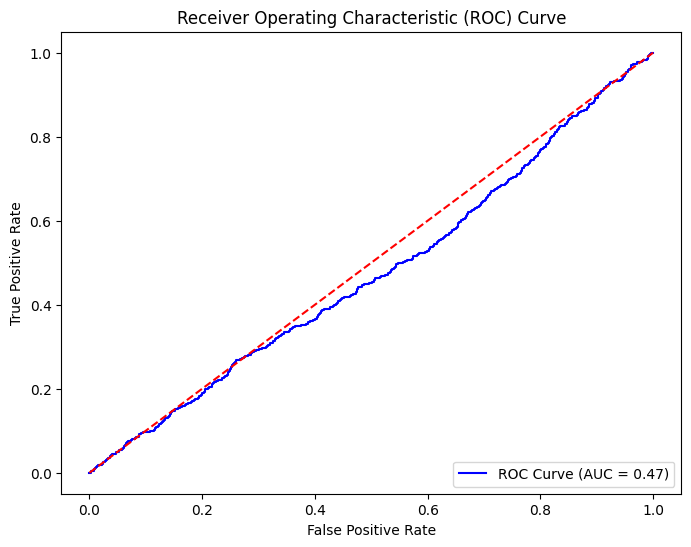

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


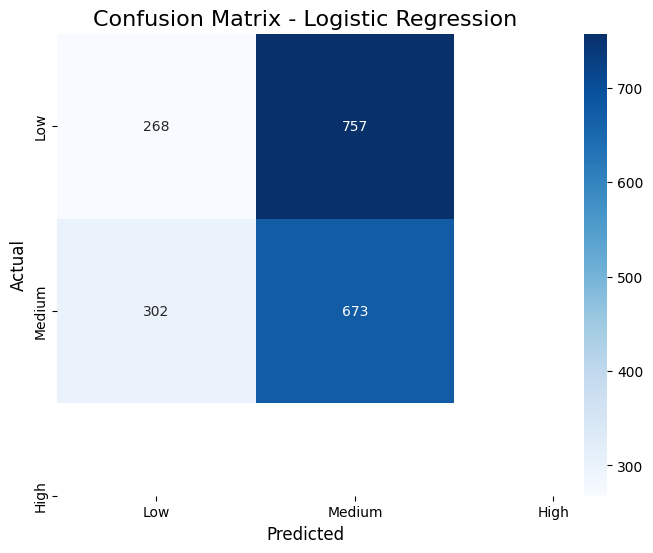

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

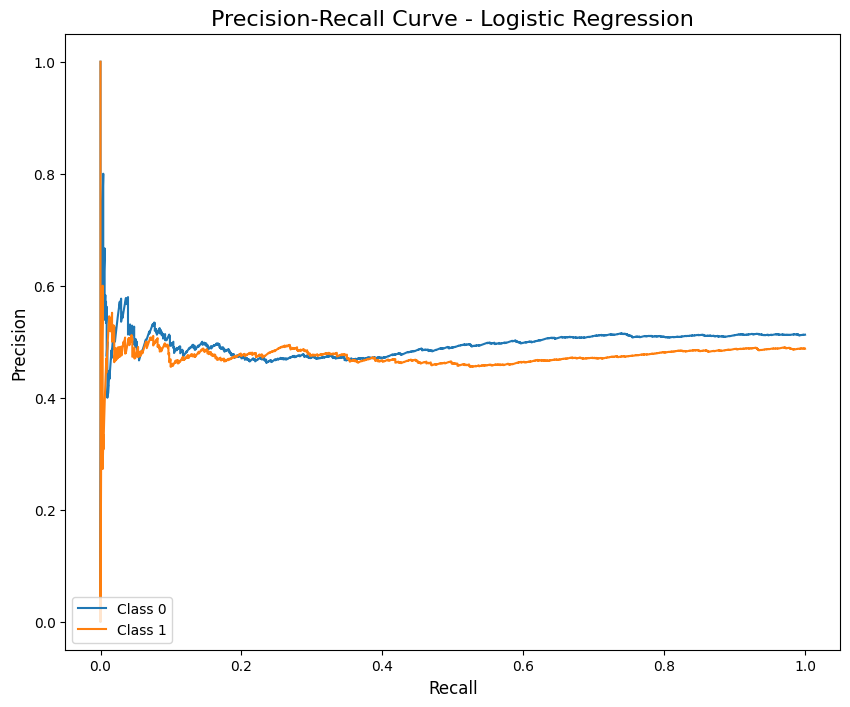

In [22]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    y_test_bin = (y_test == i).astype(int)
    precision, recall, _ = precision_recall_curve(y_test_bin, model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title("Precision-Recall Curve - Logistic Regression", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="lower left")
plt.show()


In [7]:
data = pd.read_csv('Bank Customer Details Updated.csv')

data = data.drop(columns=['Account_No'])

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])

bins = [0, 500, 700, 900]
labels = [0, 1, 2]  
data['Credit_Score_Category'] = pd.cut(data['Credit_Score'], bins=bins, labels=labels, include_lowest=True)
data = data.drop(columns=['Credit_Score'])

X = data.drop(columns=['Credit_Score_Category'])
y = data['Credit_Score_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


C:\Users\DELL\AppData\Local\Temp\ipykernel_17816\2881887492.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17816\2881887492.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6095
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.63      0.94      0.75      1248
           2       0.38      0.08      0.13       623

    accuracy                           0.61      2000
   macro avg       0.33      0.34      0.29      2000
weighted avg       0.51      0.61      0.51      2000



In [9]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
                  Feature  Importance
9         Balance_Amount    0.272168
6   No_Of_Months_On_Bank    0.200344
0                    Age    0.189334
2         EducationLevel    0.089762
8       Estimated_Income    0.075429
3         Marital_Status    0.061731
5  No_Of_Linked_Accounts    0.041773
7        Has_Credit_Card    0.029254
1                 Gender    0.025634
4           Account_Type    0.014573


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [11]:
y_pred_optimized = best_model.predict(X_test)

optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_report = classification_report(y_test, y_pred_optimized)

print("Optimized Accuracy:", optimized_accuracy)
print("Optimized Classification Report:\n", optimized_report)


Optimized Accuracy: 0.611
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.63      0.95      0.75      1248
           2       0.37      0.07      0.11       623

    accuracy                           0.61      2000
   macro avg       0.33      0.34      0.29      2000
weighted avg       0.51      0.61      0.51      2000



C:\Users\DELL\AppData\Local\Temp\ipykernel_17816\1711709158.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


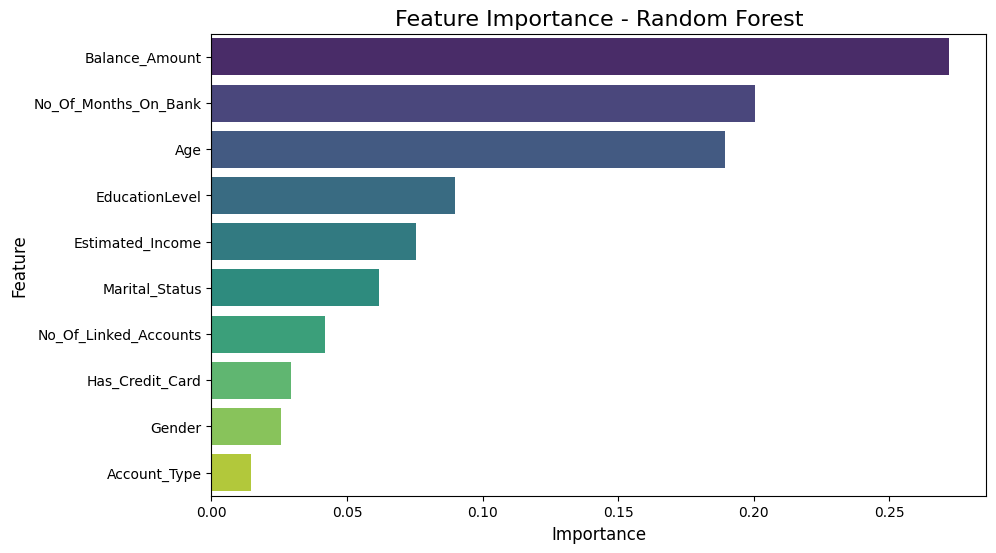

In [12]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances['Importance'],
    y=feature_importances['Feature'],
    palette='viridis'
)
plt.title("Feature Importance - Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


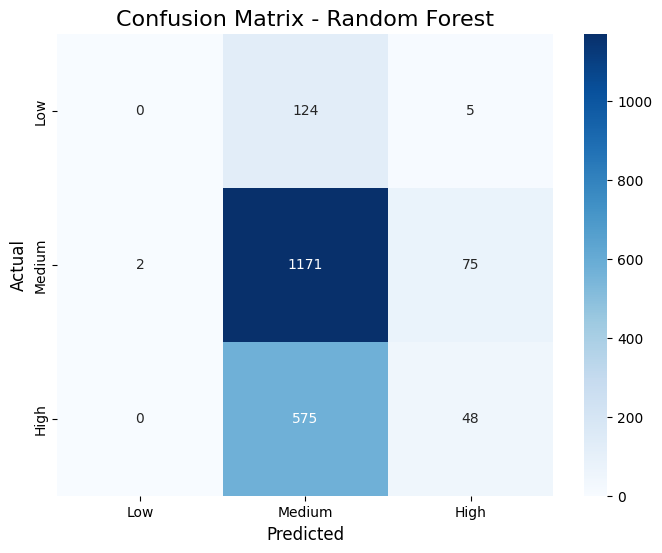

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Low', 'Medium', 'High'], 
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()


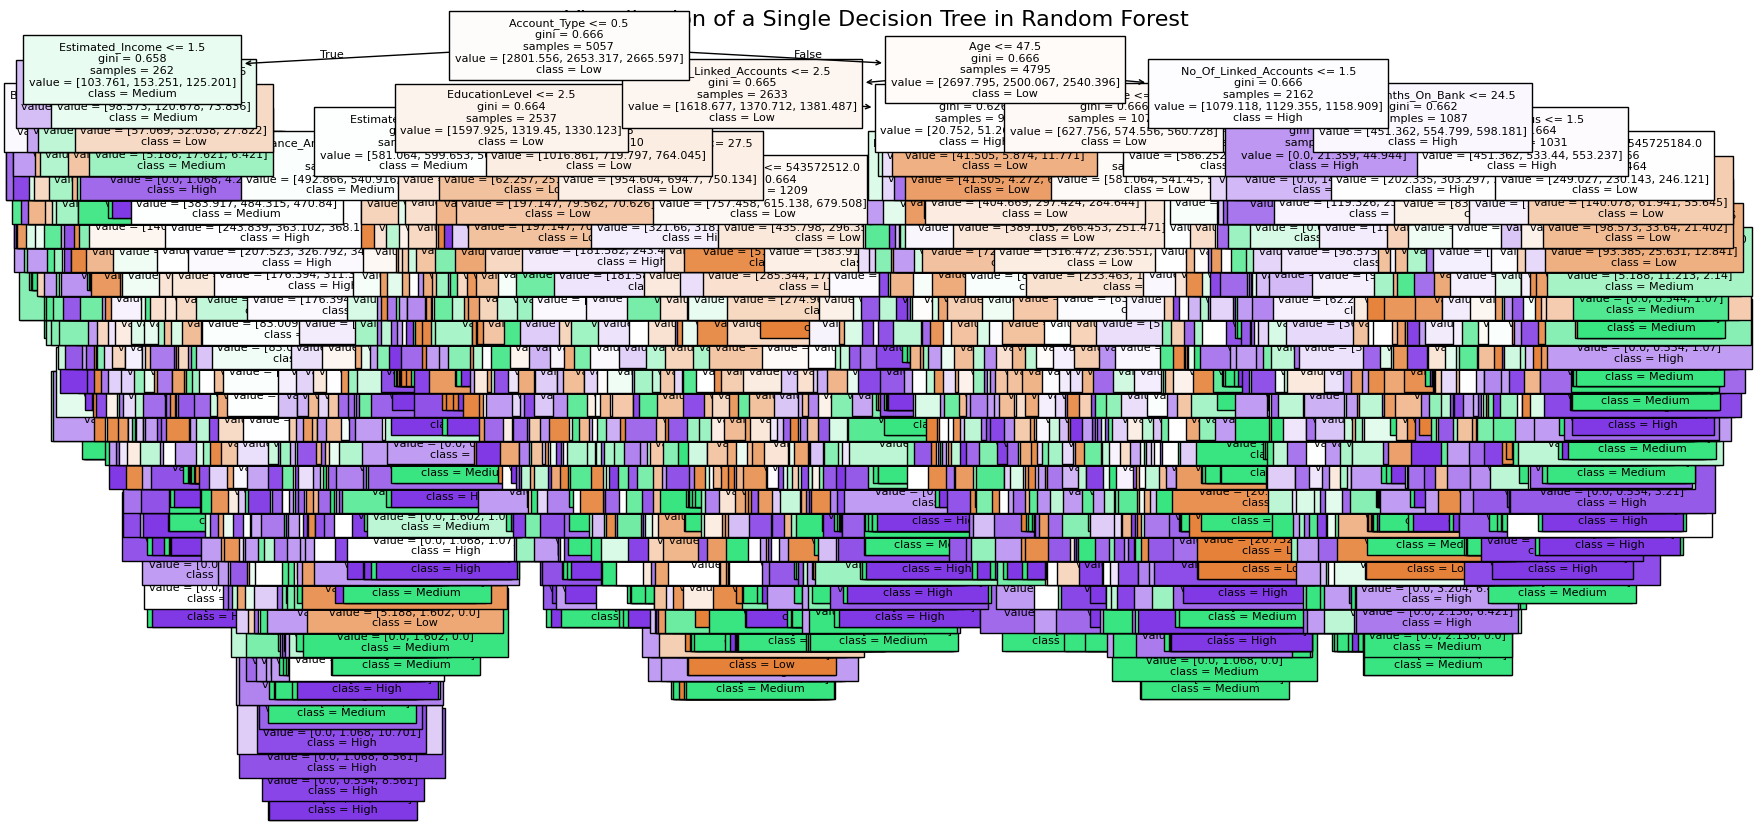

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, fontsize=8)
plt.title("Visualization of a Single Decision Tree in Random Forest", fontsize=16)
plt.show()
